In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = np.loadtxt("./image.csv", delimiter=",", dtype = np.float32)

In [4]:
len(data)*4/5

1848.0

In [5]:
idx = int(len(data)*4/5)

In [6]:
train_data = data[:idx]
test_data = data[idx:]

In [7]:
train_data_x = train_data[:, 0:-1]
train_data_y = train_data[:, [-1]]

In [8]:
test_data_x = test_data[:, 0:-1]
test_data_y = test_data[:, [-1]]

In [9]:
train_data_x.shape

(1848, 19)

In [10]:
train_data_y.shape

(1848, 1)

In [11]:
X = tf.placeholder(tf.float32, shape=[None, 19])
Y = tf.placeholder(tf.int32, shape=[None, 1])

W = tf.Variable(tf.random_normal([19, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [12]:
nb_classes = 7

In [13]:
Y_one_hot = tf.one_hot(Y, nb_classes) # one hot
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

In [14]:
W = tf.Variable(tf.random_normal([19, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [15]:
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

In [16]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

In [17]:
cost = tf.reduce_mean(cost_i)

In [18]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [19]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))

In [20]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

1000 0.697255
2000 0.554351
3000 0.48527
4000 0.442724
5000 0.413249
6000 0.391296
7000 0.374129
8000 0.360225
9000 0.348664
10000 0.338849
11000 0.330376
12000 0.322961
13000 0.316395
14000 0.310524
15000 0.30523
16000 0.300421
17000 0.296023
18000 0.291978
19000 0.288238
20000 0.284765
21000 0.281526
22000 0.278494
23000 0.275646
24000 0.272963
25000 0.270427
26000 0.268025
27000 0.265743
28000 0.263572
29000 0.261501
30000 0.259522
31000 0.257628
32000 0.255812
33000 0.254068
34000 0.252391
35000 0.250777
36000 0.24922
37000 0.247718
38000 0.246266
39000 0.244862
40000 0.243503
41000 0.242186
42000 0.240908
43000 0.239669
44000 0.238465
45000 0.237294
46000 0.236156
47000 0.235047
48000 0.233969
49000 0.232917
50000 0.231892
51000 0.230893
52000 0.229917
53000 0.228965
54000 0.228034
55000 0.227125
56000 0.226236
57000 0.225366
58000 0.224516
59000 0.223683
60000 0.222869
61000 0.22207
62000 0.221288
63000 0.220522
64000 0.21977
65000 0.219034
66000 0.218311
67000 0.217602
68000 0.2

524000 0.146673
525000 0.146629
526000 0.146584
527000 0.14654
528000 0.146495
529000 0.146451
530000 0.146408
531000 0.146364
532000 0.146321
533000 0.146278
534000 0.146235
535000 0.146192
536000 0.146149
537000 0.146106
538000 0.146064
539000 0.146021
540000 0.145979
541000 0.145936
542000 0.145894
543000 0.145852
544000 0.14581
545000 0.145767
546000 0.145725
547000 0.145683
548000 0.145642
549000 0.1456
550000 0.145558
551000 0.145517
552000 0.145475
553000 0.145433
554000 0.145392
555000 0.14535
556000 0.145309
557000 0.145268
558000 0.145227
559000 0.145185
560000 0.145144
561000 0.145103
562000 0.145062
563000 0.145022
564000 0.144981
565000 0.14494
566000 0.144899
567000 0.144859
568000 0.144819
569000 0.144778
570000 0.144738
571000 0.144698
572000 0.144658
573000 0.144618
574000 0.144579
575000 0.14454
576000 0.144501
577000 0.144462
578000 0.144424
579000 0.144385
580000 0.144346
581000 0.144308
582000 0.144269
583000 0.144231
584000 0.144193
585000 0.144155
586000 0.144117

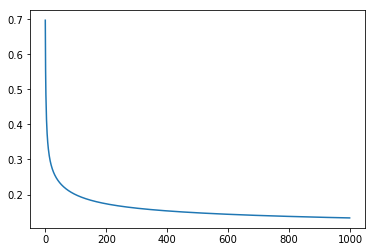

In [23]:
cost_list=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed = {X: train_data_x, Y: train_data_y}
    for step in range(1000001):
        sess.run(train, feed_dict=feed) 
        if step < 1000:
            continue
        if step % 1000 == 0:
            cost_val = sess.run(cost, feed_dict=feed)
            print(step, cost_val)
            cost_list.append(cost_val)
    # Accuracy report
    h, c, a = sess.run([hypothesis, correct_prediction, accuracy], feed_dict={X:test_data_x, Y:test_data_y})
    print("\nAccuracy: ", a) 
    plt.plot(cost_list)
    plt.show()